# Emotion Detector App using Streamlit
- Detecting emotions
- Text Classifier

In [1]:
# Importing necessary packages

# Exploratory Data Analysis Packages
import pandas as pd
import numpy as np
import joblib

# Text Cleaning 
import neattext.functions as nfx

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing all models
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Setting properties
pd.set_option('display.max_colwidth', None)

In [4]:
# Load the Dataset

df = pd.read_csv('../Data/emotion_dataset_raw.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [6]:
df.head(10)

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN I HATE FUNERALS THIS REALLY SHOWS ME HOW BLESSED I AM
3,joy,"Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself ."
4,joy,"@Iluvmiasantos ugh babe.. hugggzzz for u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang"
5,fear,I'm expecting an extremely important phonecall any minute now #terror #opportunity
6,sadness,".Couldnt wait to see them live. If missing them in NH7 wasnt painful enuf, Suraj 's performing his last gig in delhi."
7,surprise,maken Tip 2: Stop op een moment dat je het hele project wel ziet zitten. Nu dus. #derestkomtlaterwel
8,surprise,En dan krijg je ff een cadeautje van een tweep #melike
9,surprise,"@1116am Drummer Boy bij op verzoek van @BiemOosterhof . @frankcornet : welke uitvoering, van wie?"


In [7]:
# Counting rows for emotion types
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

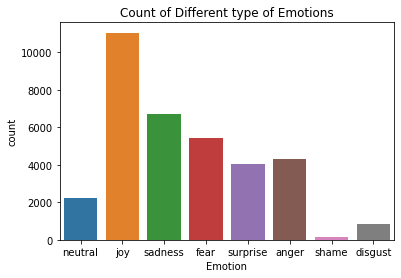

In [8]:
# Plot Count of Emotions
sns.countplot(x='Emotion', data = df)
plt.title('Count of Different type of Emotions')
plt.show()

In [9]:
df.shape

(34792, 2)

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(31162, 2)

In [12]:
# Removing StopWords
df['CleanText'] = df['Text'].apply(nfx.remove_stopwords)

In [13]:
# Remove UserHandles
df['CleanText'] = df['CleanText'].apply(nfx.remove_userhandles)

In [14]:
df.head(5)

,Emotion,Text,CleanText
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN I HATE FUNERALS THIS REALLY SHOWS ME HOW BLESSED I AM,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS SHOWS BLESSED
3,joy,"Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself .","eye ! true hazel eye-and brilliant ! Regular features , open countenance , complexion , Oh ! bloom health , pretty height size ; firm upright figure ! health , merely bloom , air , head , glance . hears child ' picture health ' ; , gives idea complete picture grown-up health . loveliness ."
4,joy,"@Iluvmiasantos ugh babe.. hugggzzz for u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang","ugh babe.. hugggzzz u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam fil ko ang"


In [15]:
x_train, x_test, y_train, y_test = train_test_split(df['CleanText'], df['Emotion'], test_size=0.2, random_state=30)

In [16]:
class md:
  bold = '\033[1m'
  end = '\033[0m'

In [17]:
def buildModels(x_train, x_test, y_train, y_test):
    
    modelScores = {}
    
    models = [
      ('K-MeansClassifier', KMeans()),
      ('XGBClassifier', XGBClassifier()),
      ('RidgeClassifier', RidgeClassifier()),
      ('LogisticRegression', LogisticRegression(solver='lbfgs', max_iter=10000)),
      ('ADABoostClassifier', AdaBoostClassifier()),
      ('KNearestNeighbor', KNeighborsClassifier()),
      ('ExtraTreesClassifier', ExtraTreesClassifier()),
      ('SupportVectorClassifier', SVC(probability = True)),
      ('RandomForestClassifier', RandomForestClassifier()),
      ('DecisionTreeClassifier', DecisionTreeClassifier())
    ]
    
    for model in models:
        print(md.bold + "========================================  " + model[0] + "  ========================================" + md.end)
        # Creating pipeline
        print(md.bold + "Creating Pipeline..." + md.end)
        pipeline = Pipeline(steps=[('cv', CountVectorizer()), model])
        
        # Training model
        print(md.bold + "Training Model..." + md.end)
        pipeline.fit(x_train, y_train)
        
        # Getting Results
        print(md.bold + "Data:" + md.end)
        print(pipeline.predict(["i am so glad to hear such non sense"]))
        score = pipeline.score(x_test, y_test)
        modelScores[model] = score
        print(score)
        
        # Storing model
        print(md.bold + "Storing Model..." + md.end)
        with open(f"../Model/{model[0]}.pkl", "wb") as ec:
            joblib.dump(pipeline, ec)
        print(md.bold + "Process Complete!!\n\n\n" + md.end)

    # Processing Model Scores
    topScorers = sorted(set(modelScores.values()))
    first = topScorers[-1]
    firstName = [key for key, value in modelScores.items() if value == first]
    second = topScorers[-2]
    secondName = [key for key, value in modelScores.items() if value == second]

    # Printing Processed Result
    print(md.bold + "Top 2 Scoring Models:\n{}: {}\n{}: {}".format(firstName[0], first, secondName[0], second) + md.end)

In [18]:
buildModels(x_train, x_test, y_train, y_test)

========================================  K-MeansClassifier  ========================================
Creating Pipeline...
Training Model...
Data:
[2]
-47043.40411201368
Storing Model...
Process Complete!!



========================================  XGBClassifier  ========================================
Creating Pipeline...
Training Model...


/home/samprit/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:33:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Data:
['joy']
0.5453232793197497
Storing Model...
Process Complete!!



========================================  RidgeClassifier  ========================================
Creating Pipeline...
Training Model...
Data:
['joy']
0.5512594256377347
Storing Model...
Process Complete!!



========================================  LogisticRegression  ========================================
Creating Pipeline...
Training Model...
Data:
['joy']
0.581421466388577
Storing Model...
Process Complete!!



========================================  ADABoostClassifier  ========================================
Creating Pipeline...
Training Model...
Data:
['joy']
0.34269212257339965
Storing Model...
Process Complete!!



====================================